In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
from IPython.display import clear_output

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
pd.options.display.width = 2000
pd.options.display.max_colwidth = 2000

display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
df = pd.read_csv('results.csv')
df.columns

Index(['alpha', 'avg_patrician_wealth', 'avg_plebeian_wealth', 'beta', 'diff_avg_wealth', 'diff_num_trans', 'diff_wealth_by_trans', 'gamma', 'mu', 'n_patricians', 'n_plebeians', 'patrician_transactions', 'patrician_wealth_by_trans', 'plebeian_transactions', 'plebeian_wealth_by_trans', 'sigma', 'symmetric'], dtype='object')

In [3]:
df.head()

,alpha,avg_patrician_wealth,avg_plebeian_wealth,beta,diff_avg_wealth,diff_num_trans,diff_wealth_by_trans,gamma,mu,n_patricians,n_plebeians,patrician_transactions,patrician_wealth_by_trans,plebeian_transactions,plebeian_wealth_by_trans,sigma,symmetric
0,0.5,5.017910,5.108890,0.5,0.090980,0,0.005422,0.25,"(-0.5, 0.5)",100,100,1678,0.299041,1678,0.304463,0.1,True
1,0.5,5.350806,5.265715,0.5,-0.085090,0,-0.004407,0.50,"(-0.5, 0.5)",100,100,1931,0.277100,1931,0.272694,0.1,True
2,0.5,5.426264,5.447329,0.5,0.021066,0,0.001032,1.00,"(-0.5, 0.5)",100,100,2041,0.265863,2041,0.266895,0.1,True
3,0.5,2.937225,2.951901,1.0,0.014677,0,0.001422,0.25,"(-0.5, 0.5)",100,100,1032,0.284615,1032,0.286037,0.1,True
4,0.5,3.496850,3.378633,1.0,-0.118216,0,-0.009367,0.50,"(-0.5, 0.5)",100,100,1262,0.277088,1262,0.267721,0.1,True


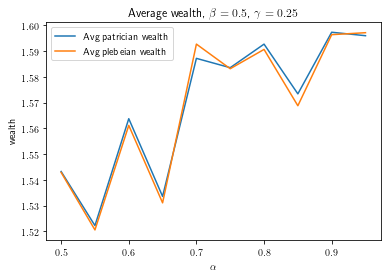

In [19]:
mu_idx = df.mu == "(-3.0, 3.0)"
sigma_idx = df.sigma == 0.1
beta_idx = df.beta == 0.5
gamma_idx = df.gamma == 1.0

x = df[mu_idx & sigma_idx & beta_idx & gamma_idx]['alpha']

y_patrician_wealth = df[mu_idx & sigma_idx & beta_idx & gamma_idx]['patrician_wealth_by_trans']
y_plebeian_wealth = df[mu_idx &  sigma_idx & beta_idx & gamma_idx]['plebeian_wealth_by_trans']

matplotlib.rcParams['text.usetex'] = True

fig = plt.figure()
ax = fig.gca()

ax.plot(x, y_patrician_wealth, label='Avg patrician wealth')
ax.plot(x, y_plebeian_wealth, label='Avg plebeian wealth')

ax.set_title(r"Average wealth, $\beta=0.5$, $\gamma=0.25$")
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("wealth")
ax.legend()

In [17]:
df.gamma.unique()

array([0.25, 0.5 , 1.  ])